In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline

In [2]:
df = pd.read_csv('heightweight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

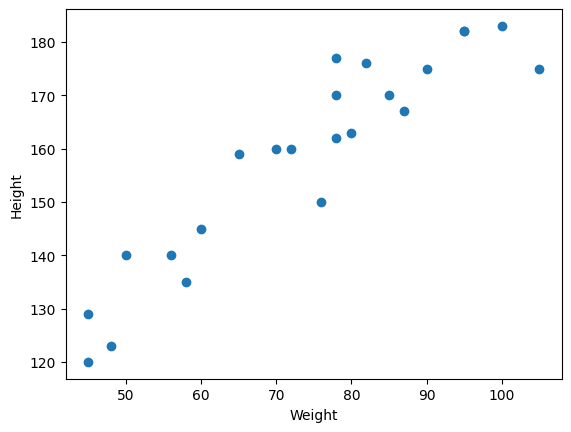

In [3]:
#scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

With Increase weight...height also increaseing

In [4]:
#correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


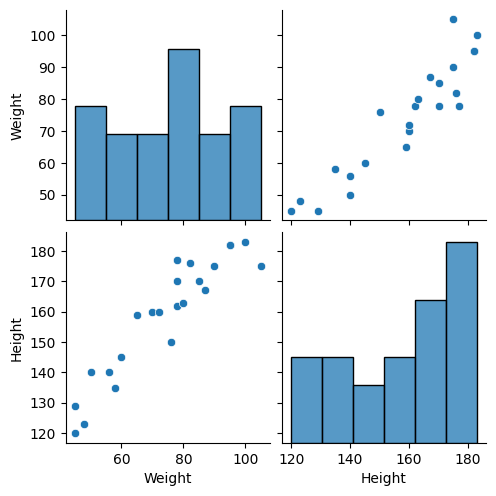

In [5]:
import seaborn as sns

sns.pairplot(df)

In [6]:
## indepenednt and dependent features
X = df[['Weight']]      # Independent feaure should be Df or 2D Array
y = df['Height']        # Dependent feature can be Series


In [7]:
print(np.array(X).shape)
print(np.array(y).shape)

(23, 1)
(23,)


In [8]:
# Install scikit-learn
# %pip install scikit-learn

# Train Test Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
# Perform Standardisation --> Mean = 0 and Standard Deviation = 1
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[ 1.45675115],
       [-0.18252438],
       [-1.47052658],
       [ 1.16402338],
       [ 0.28584006],
       [-0.59234326],
       [-0.29961548],
       [-1.58761768],
       [ 0.16874895],
       [ 0.05165784],
       [ 0.16874895],
       [ 0.87129561],
       [ 0.69565894],
       [-0.88507103],
       [-1.76325435],
       [ 0.16874895],
       [ 1.74947892]])

*Diffrence between Fit_transform and transform*

**fit_transform**
Purpose: Combines the functionality of fit and transform.
Usage: Used when you want to both fit the transformer to the data and then transform the data in one step.

**transform**
Purpose: Only transforms the data using the already fitted transformer.
Usage: Used when the transformer has already been fitted to the data, and you want to transform new data or the same data again.

1. fit_transform: Fits the transformer to the data and then transforms the data.
2. transform: Only transforms the data using an already fitted transformer.

In [13]:
X_test = sc.transform(X_test)
X_test

array([[ 1.16402338],
       [ 0.40293117],
       [-1.11925325],
       [ 0.57856783],
       [-1.76325435],
       [-1.00216214]])

In [15]:
## Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [18]:
regressor = LinearRegression(n_jobs=-1)

In [19]:
regressor.fit(X_train, y_train) #data always should be in 2D array

LinearRegression(n_jobs=-1)

In [23]:
print("Some Details: ")
print("Coefficient: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)
print("Training Score: ", regressor.score(X_train, y_train)*100)
print("Testing Score: ", regressor.score(X_test, y_test)*100)


Some Details: 
Coefficient:  [16.53415595]
Intercept:  159.47058823529412
Training Score:  82.9271269797514
Testing Score:  93.5386069188885


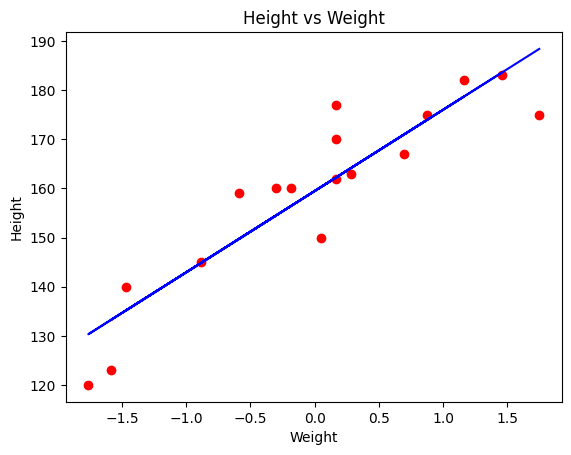

In [ ]:
#plot these points beautifully with labels of intercept and coefficient
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Height vs Weight')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()


#### prediction of test data

1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 159.470 + 16.53(X_test)

In [30]:
#prediction for test data
y_pred = regressor.predict(X_test)
y_pred

array([178.71673229, 166.13271502, 140.96468049, 169.03671901,
       130.31666588, 142.90068314])

#### Performance metrics

In [33]:
#performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)



Mean Squared Error:  29.02601358548199
Mean Absolute Error:  4.049310530227544
Root Mean Squared Error:  5.387579566510548


In [35]:
# rsquare 
from sklearn.metrics import r2_score

In [36]:
score = r2_score(y_test, y_pred)
print("R-Square: ", score)

R-Square:  0.935386069188885


In [38]:
#Adjusted R-Square
n = len(X_train)
p = X_train.shape[1]
1 - (1-score)*(n-1)/(n-p-1)

0.9310784738014773